In [1]:
import numpy as np
import cupy as cp
import poppy

import astropy.units as u
from pathlib import Path
from importlib import reload

import misc
reload(misc)

data_dir = Path('/groups/douglase/kians-data-files/poppy-cupy-tests-data')

# Compare results between POPPY and PROPER for HLC mode.

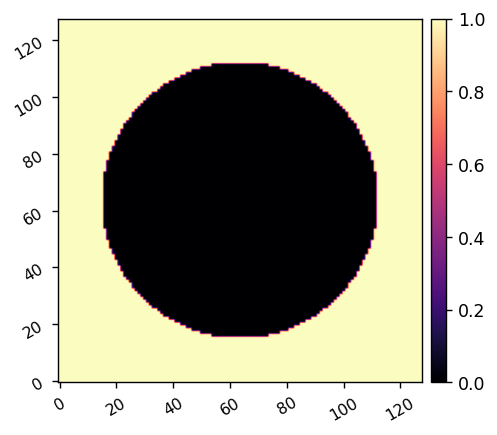

In [2]:
npsf = 128
mask = np.ones((npsf,npsf))
xfp = (np.linspace(0, npsf-1, npsf) - npsf/2 + 1/2) * 0.2
xf,yf = np.meshgrid(xfp,xfp)
rf = np.sqrt(xf**2 + yf**2)
mask[rf<9.7] = 0
misc.myimshow(mask)

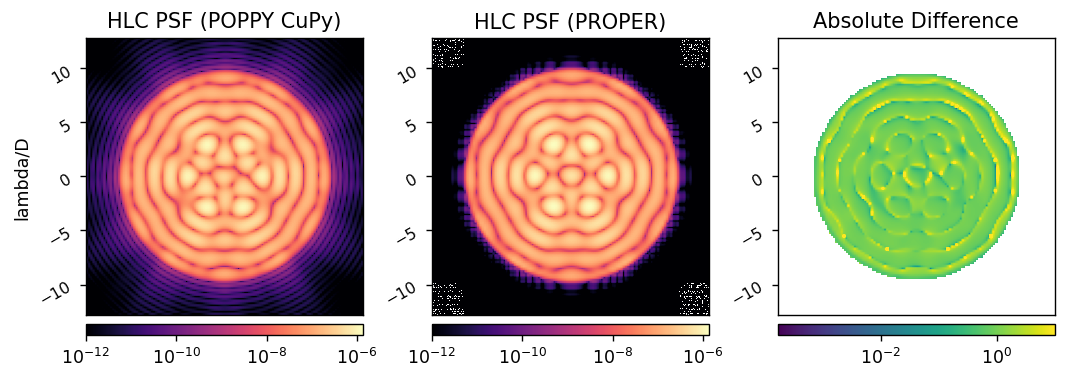

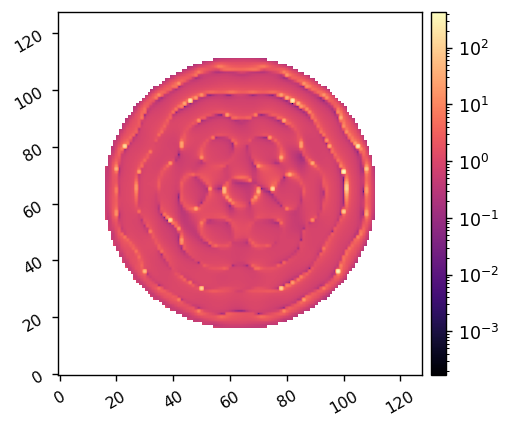

1.7620062144125055

In [9]:
poppy_wfs = misc.load_pickle(data_dir/'hlc_gpu_wfs_mono')
proper_wfs = misc.load_pickle(data_dir/'hlc_proper_wfs_mono')

poppy_wfs.rotate(180) # rotate POPPY wavefr0nt to match PROPER sign convention
poppy_psf = np.roll(poppy_wfs.intensity.get(), (1,1), axis=(0,1)) # shift POPPY PSF to be aligned

proper_psf = np.abs(proper_wfs)**2

diff = np.abs( poppy_psf-proper_psf )
rat = np.ma.masked_array(poppy_psf/proper_psf, mask)

vmin = 1e-12
vmax = np.max((poppy_psf.max(), proper_psf.max()))

misc.myimshow3(poppy_psf, proper_psf, rat,
               'HLC PSF (POPPY CuPy)', 'HLC PSF (PROPER)', 'Absolute Difference', 
               titlesize=12,
               cmap3='viridis',
               pxscl1=0.2, pxscl2=0.2, pxscl3=0.2,
               use_ylabel2=False, use_ylabel3=False,
               lognorm1=True, lognorm2=True, lognorm3=True, 
               vmin1=vmin, vmin2=vmin,
               vmax1=vmax, vmax2=vmax, 
               vmax3=10,
               )

misc.myimshow(per_diff, lognorm=True)
np.ma.mean(per_diff)

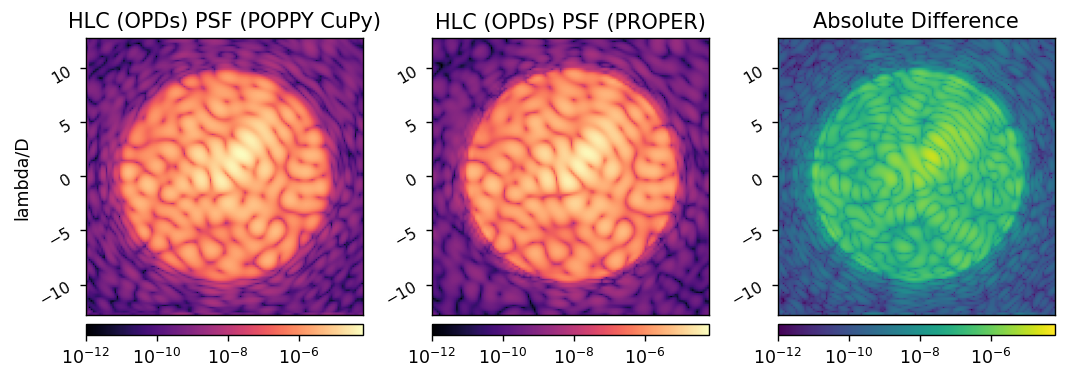

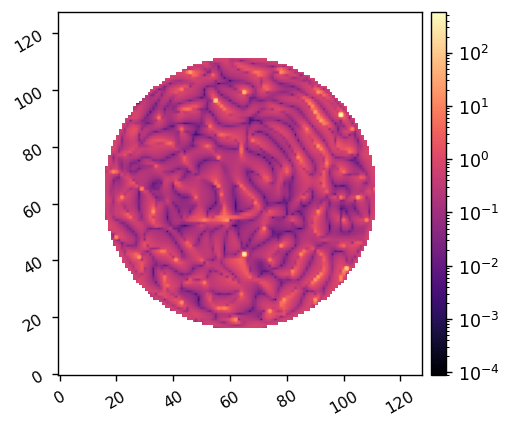

0.692713450412415

In [49]:
poppy_wfs = misc.load_pickle(data_dir/'hlc_gpu_wfs_mono_opds')
proper_wfs = misc.load_pickle(data_dir/'hlc_proper_wfs_mono_opds')

poppy_wfs.rotate(180) # rotate POPPY wavefr0nt to match PROPER sign convention
poppy_psf = np.roll(poppy_wfs.intensity.get(), (1,1), axis=(0,1)) # shift POPPY PSF to be aligned

proper_psf = np.abs(proper_wfs)**2

diff = np.abs( poppy_psf-proper_psf )

vmin = 1e-12
vmax = np.max((poppy_psf.max(), proper_psf.max()))

misc.myimshow3(poppy_psf, proper_psf, diff,
               'HLC (OPDs) PSF (POPPY CuPy)', 'HLC (OPDs) PSF (PROPER)', 'Absolute Difference', 
               titlesize=12, 
               cmap3='viridis',
               pxscl1=0.2, pxscl2=0.2, pxscl3=0.2,
               use_ylabel2=False, use_ylabel3=False,
               lognorm1=True, lognorm2=True, lognorm3=True, 
               vmin1=vmin, vmin2=vmin, vmin3=vmin,
               vmax1=vmax, vmax2=vmax, vmax3=vmax)

per_diff = np.ma.masked_array(diff/proper_psf, mask)
misc.myimshow(per_diff, lognorm=True)
np.ma.mean(per_diff)

### Broadband comparison

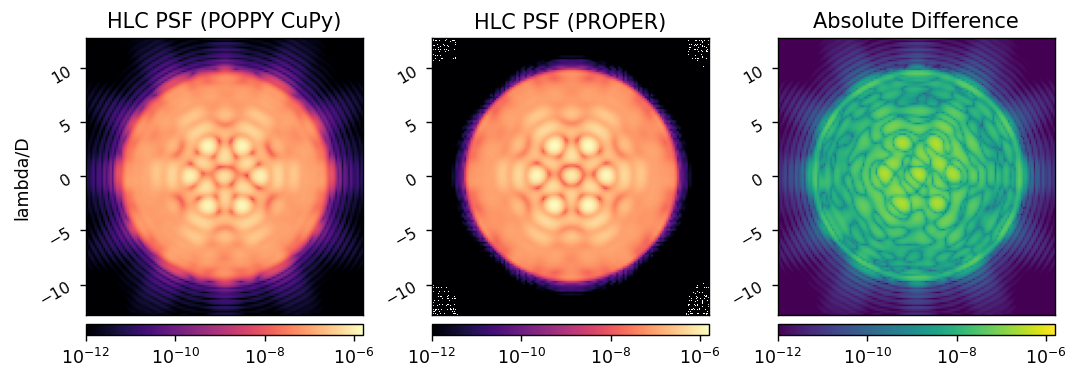

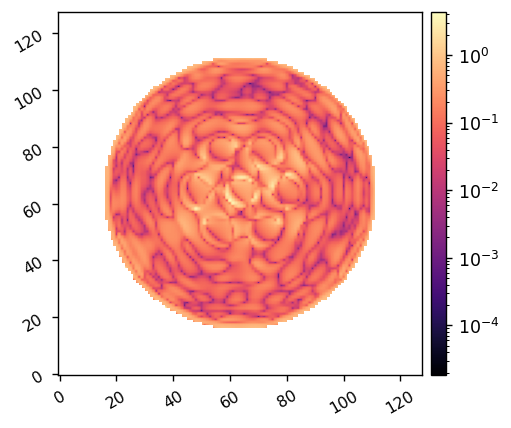

0.17837927220814376

In [50]:
poppy_wfs = misc.load_pickle(data_dir/'hlc_gpu_wfs_broad')
proper_wfs = misc.load_pickle(data_dir/'hlc_proper_wfs_broad')

poppy_psf = 0
proper_psf = 0
for i in range(len(proper_wfs)):
    poppy_wfs[i].rotate(180) # rotate POPPY wavefr0nt to match PROPER sign convention
    poppy_psf += np.roll(poppy_wfs[i].intensity.get(), (1,1), axis=(0,1))/len(proper_wfs) 
    
    proper_psf += np.abs(proper_wfs[i])**2/len(proper_wfs)

diff = np.abs( poppy_psf-proper_psf )

vmin = 1e-12
vmax = np.max((poppy_psf.max(), proper_psf.max()))

reload(misc)
misc.myimshow3(poppy_psf, proper_psf, diff,
               'HLC PSF (POPPY CuPy)', 'HLC PSF (PROPER)', 'Absolute Difference', 
               titlesize=12,
               cmap3='viridis',
               npix=128,
               pxscl1=0.2, pxscl2=0.2, pxscl3=0.2,
               use_ylabel2=False, use_ylabel3=False,
               lognorm1=True, lognorm2=True, lognorm3=True, 
               vmin1=vmin, vmin2=vmin, vmin3=vmin, 
               vmax1=vmax, vmax2=vmax, vmax3=vmax)

per_diff = np.ma.masked_array(diff/proper_psf, mask)
misc.myimshow(per_diff, lognorm=True)
np.ma.mean(per_diff)

# Compare results between POPPY and PROPER for the SPC-Wide mode.
This mode is currently not functioning as expected in POPPY. 

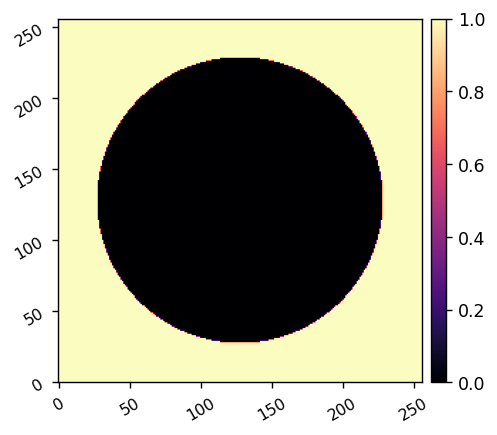

In [54]:
npsf = 256
mask = np.ones((npsf,npsf))
xfp = (np.linspace(0, npsf-1, npsf) - npsf/2 + 1/2) * 0.2
xf,yf = np.meshgrid(xfp,xfp)
rf = np.sqrt(xf**2 + yf**2)
mask[rf<20.1] = 0
misc.myimshow(mask)

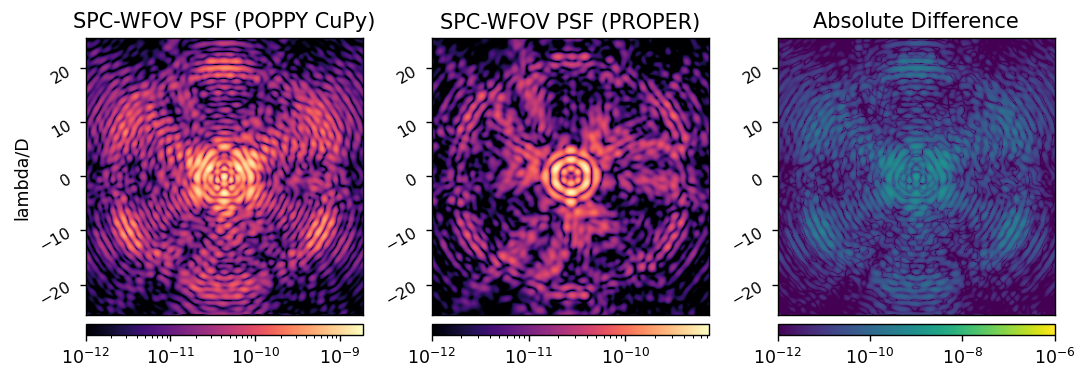

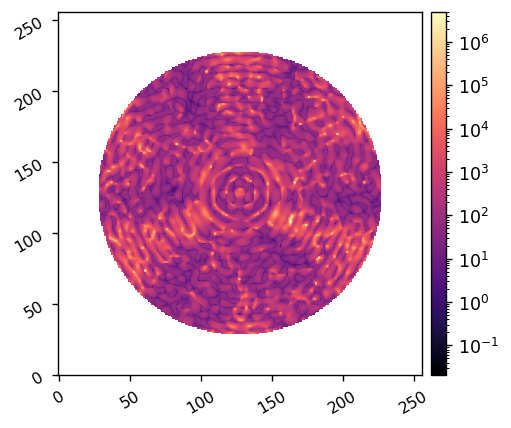

2878.686001020022

In [58]:
poppy_wfs = misc.load_pickle(data_dir/'spcw_gpu_wfs_mono')
proper_wfs = misc.load_pickle(data_dir/'spcw_proper_wfs_mono')

poppy_wfs.rotate(180) # rotate POPPY wavefr0nt to match PROPER sign convention
poppy_psf = np.roll(poppy_wfs.intensity.get(), (1,1), axis=(0,1)) # shift POPPY PSF to be aligned

proper_psf = np.abs(proper_wfs)**2

diff = np.abs( poppy_psf-proper_psf )

vmin = 1e-12
misc.myimshow3(poppy_psf, proper_psf, diff,
               'SPC-WFOV PSF (POPPY CuPy)', 'SPC-WFOV PSF (PROPER)', 'Absolute Difference', 
               titlesize=12, 
               cmap3='viridis',
               pxscl1=0.2, pxscl2=0.2, pxscl3=0.2,
               use_ylabel2=False, use_ylabel3=False,
               lognorm1=True, lognorm2=True, lognorm3=True, 
               vmin1=vmin, vmin2=vmin, vmin3=vmin, vmax3=1e-6)

per_diff = np.ma.masked_array(diff/proper_psf, mask) * 100
misc.myimshow(per_diff, lognorm=True)
np.ma.mean(per_diff)